Notebook showing usage of the data detective package.

**References**
* https://facebook.github.io/prophet/

In [1]:
import detective.core as detective
import detective.helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = helpers.load_url(filename)

In [3]:
# For local db, just need the path
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'
DB_URL = 'sqlite:////' + db_path

## Load the complete db

In [4]:
%%time
parser = detective.DataParser(DB_URL)

/Users/robincole/Documents/Github/HASS-data-detective/detective/core.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sensors_df['state'] = sensors_df['state'].astype('float')


CPU times: user 15.1 s, sys: 15.6 s, total: 30.7 s
Wall time: 1min 14s


In [13]:
parser.list_sensors[0:10]

['sensor.next_train_to_wat',
 'sensor.next_bus_to_new_malden',
 'sensor.darksky_sensor_temperature',
 'sensor.darksky_sensor_precip_probability',
 'sensor.iphone_battery_level',
 'sensor.robins_iphone_battery_level',
 'sensor.blink_blink_camera_percy_temperature',
 'sensor.blink_blink_camera_percy_notifications',
 'sensor.next_train_in',
 'sensor.home_to_waterloo']

In [6]:
parser.get_sensors.head()

entity,sensor.average_indoor_temp,sensor.bedroom_light_sensor,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.breaches_fredallcardgmailcom,...,sensor.next_train_to_wat,sensor.next_train_to_wim,sensor.remote_living_room_button,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.volume_used_volume_1,sensor.wipy_humidity,sensor.wipy_memory,sensor.wipy_temperature,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2017-10-28 06:48:00.143377,20.2,15621.0,18.89,1.0,21.0,98.51,43.58,1033.93,21.07,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.060922,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.93,21.07,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.069416,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.93,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.076784,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.95,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.079950,20.2,15621.0,18.89,1.0,21.0,98.54,43.50,1033.95,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0


#### Plot a single sensor
Convenience to plot a single sensor.

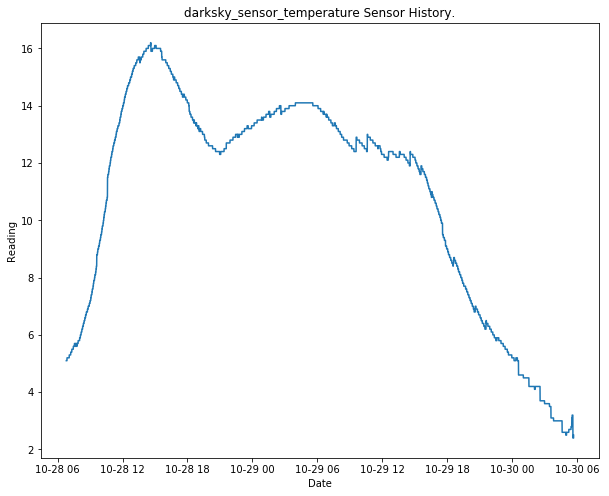

In [8]:
sensor = 'sensor.darksky_sensor_temperature'
parser.plot_sensor(sensor)

#### Pairplot
A seaborn pair plot to identify correlations.

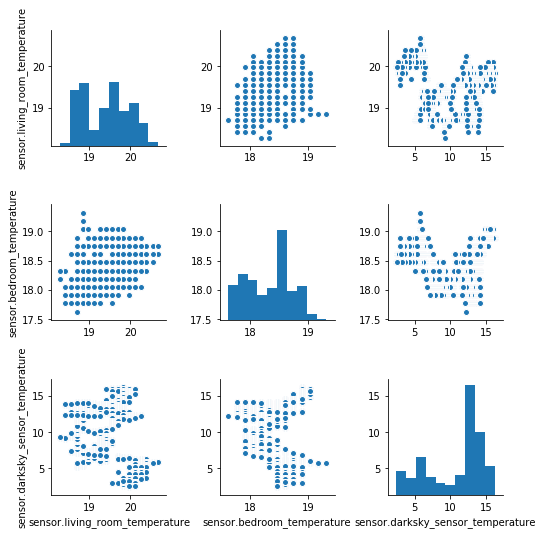

In [9]:
parser.sensor_pairplot(['sensor.living_room_temperature',
                        'sensor.bedroom_temperature',
                        'sensor.darksky_sensor_temperature'])

#### Prediction with prophet
Lets do some forecasting using prophet.

In [10]:
%%time
sensor = 'sensor.darksky_sensor_temperature'
model, future = parser.prophet_model(sensor, periods=365, freq='H')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


CPU times: user 20.6 s, sys: 668 ms, total: 21.3 s
Wall time: 22.6 s


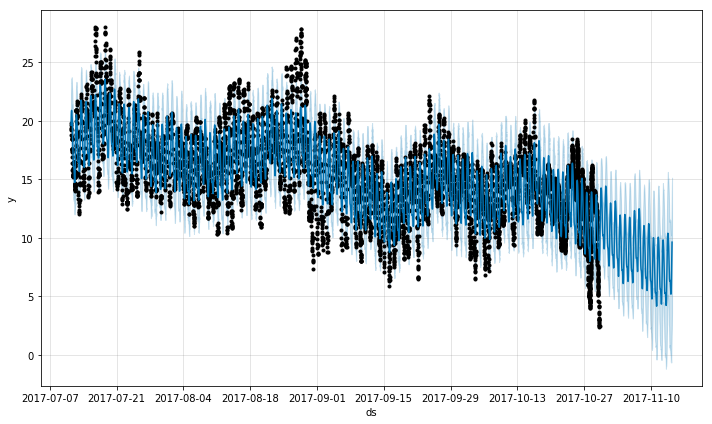

In [11]:
model.plot(future)
plt.show()

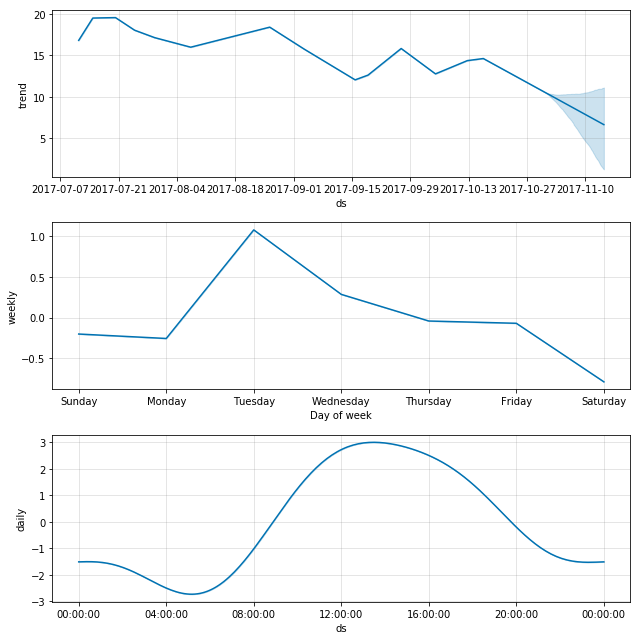

In [12]:
model.plot_components(future)
plt.show()

Clearly the daily trend is for the warmest temperatures at early afternoon